In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r"C:\Users\blend\Projects\Data\Mental_Health_and_Social_Media_Balance_Dataset.csv")
df.copy()


,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7,6,2,5,Facebook,10
1,U002,30,Other,5.1,7,8,5,3,LinkedIn,10
2,U003,23,Other,7.4,6,7,1,3,YouTube,6
3,U004,36,Female,5.7,7,8,1,1,TikTok,8
4,U005,34,Female,7.0,4,7,5,1,X (Twitter),8
...,...,...,...,...,...,...,...,...,...,...
495,U496,23,Male,6.9,5,7,4,2,X (Twitter),10
496,U497,43,Female,5.6,7,6,5,2,Facebook,9
497,U498,41,Male,7.7,5,7,2,2,LinkedIn,8
498,U499,23,Male,4.2,9,7,0,2,Facebook,9


In [3]:
df.shape

(500, 10)

Correlation coefficient: 0.740

Average Stress Level by Screen Time Category:
                          mean       std  count
Screen_Time_Category                           
Light (0-4h)          4.932039  1.096001    103
Moderate (4-8h)       6.904110  1.248784    365
Heavy (8-12h)         8.781250  0.906406     32
Extreme (12-24h)           NaN       NaN      0


C:\Users\blend\AppData\Local\Temp\ipykernel_31152\3829117712.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Screen_Time_Category')['Stress_Level(1-10)'].agg(['mean', 'std', 'count']))


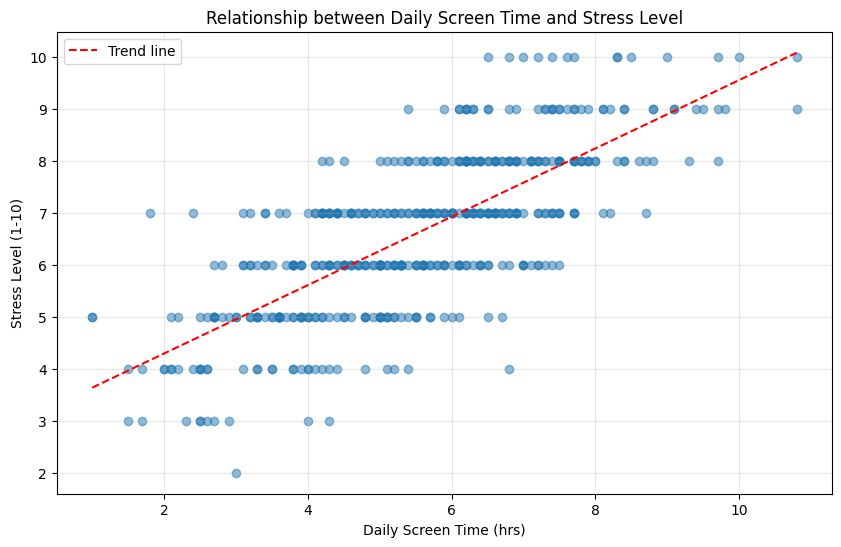

In [17]:
# Calculate correlation
correlation = df['Daily_Screen_Time(hrs)'].corr(df['Stress_Level(1-10)'])
print(f"Correlation coefficient: {correlation:.3f}")

# Summary statistics by screen time ranges
df['Screen_Time_Category'] = pd.cut(df['Daily_Screen_Time(hrs)'], 
                                     bins=[0, 4, 8, 12, 24],
                                     labels=['Light (0-4h)', 'Moderate (4-8h)', 'Heavy (8-12h)', 'Extreme (12-24h)'])

print("\nAverage Stress Level by Screen Time Category:")
print(df.groupby('Screen_Time_Category')['Stress_Level(1-10)'].agg(['mean', 'std', 'count']))

# Enhanced visualization
plt.figure(figsize=(10, 6))
plt.scatter(df['Daily_Screen_Time(hrs)'], df['Stress_Level(1-10)'], alpha=0.5)
z = np.polyfit(df['Daily_Screen_Time(hrs)'], df['Stress_Level(1-10)'], 1)
p = np.poly1d(z)
plt.plot(df['Daily_Screen_Time(hrs)'].sort_values(), p(df['Daily_Screen_Time(hrs)'].sort_values()), "r--", label='Trend line')
plt.xlabel('Daily Screen Time (hrs)')
plt.ylabel('Stress Level (1-10)')
plt.title('Relationship between Daily Screen Time and Stress Level')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

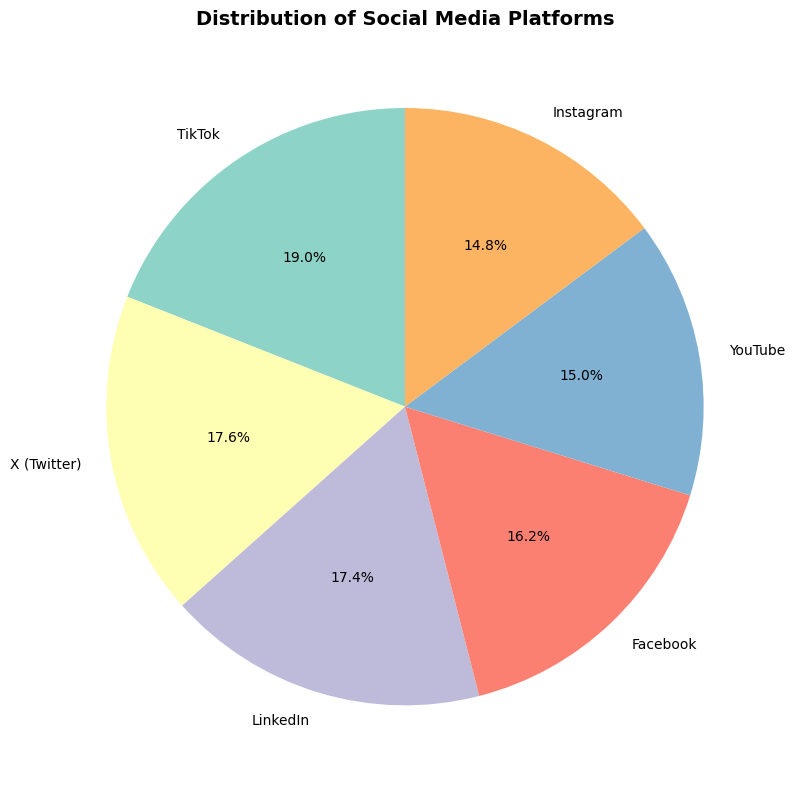

In [24]:
plt.figure(figsize=(10, 8))
plt.pie(df['Social_Media_Platform'].value_counts(), 
        labels=df['Social_Media_Platform'].value_counts().index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Set3(range(len(df['Social_Media_Platform'].unique()))))
plt.title('Distribution of Social Media Platforms', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()